# Analysis of the internal features of rent data

The data frame is from domain website and was gotten by API. 

This notebook shows the internal features of rent data.

In [1]:
import pandas as pd

# Read data
rent = pd.read_csv("../rent_data/renew(final).csv")

# See data
rent

,Unnamed: 0,price,state,propertyType,bathrooms,bedrooms,carspaces,region,suburb,postcode,dateListed,listingSlug,latitude,longitude
0,0,240.0,VIC,ApartmentUnitFlat,1.0,1.0,1,Melbourne Region,ELWOOD,3184,2022-09-12T17:48:43,7-23-bendigo-avenue-elwood-vic-3184-16085426,-37.885467,144.983170
1,1,690.0,VIC,Duplex,2.0,3.0,2,Melbourne Region,CAULFIELD SOUTH,3162,2022-09-12T17:36:10,1-12-omar-street-caulfield-south-vic-3162-1608...,-37.890450,145.019791
2,2,385.0,VIC,ApartmentUnitFlat,1.0,1.0,0,Melbourne Region,SOUTHBANK,3006,2022-09-12T17:32:37,602-250-city-road-southbank-vic-3006-16085393,-37.825733,144.959671
3,3,585.0,VIC,House,2.0,4.0,2,Melbourne Region,DROMANA,3936,2022-09-12T17:21:09,26-william-street-dromana-vic-3936-16085361,-38.330800,144.973984
4,4,450.0,VIC,ApartmentUnitFlat,1.0,2.0,2,Melbourne Region,MONTMORENCY,3094,2022-09-12T17:18:52,2-14-binns-street-montmorency-vic-3094-16085351,-37.716026,145.122162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,2071,1000.0,VIC,Townhouse,3.0,3.0,3,Eastern Suburbs,MONT ALBERT,3127,2022-08-22T15:57:33,1-803-whitehorse-road-mont-albert-vic-3127-160...,-37.816353,145.111465
1294,2072,430.0,VIC,House,1.0,2.0,1,Melbourne Region,BRUNSWICK WEST,3055,2022-08-22T15:51:11,715-5-olive-york-way-brunswick-west-vic-3055-1...,-37.758736,144.939041
1295,2073,440.0,VIC,House,2.0,4.0,2,Melbourne Region,DEANSIDE,3336,2022-08-22T15:45:02,19-amreli-st-deanside-vic-3336-15176030,-37.738228,144.703522
1296,2074,680.0,VIC,Townhouse,2.0,2.0,2,Melbourne Region,BLACK ROCK,3193,2022-08-22T15:18:16,4-31-bayview-crescent-black-rock-vic-3193-1605...,-37.968330,145.016400


### Data Pre-processing

In [2]:
# initial number of rows
df_initial = rent.shape[0]
df_initial

1298

In [3]:
# Drop rows with missing values
rent.isnull().sum()

Unnamed: 0      0
price           7
state           0
propertyType    0
bathrooms       0
bedrooms        0
carspaces       0
region          0
suburb          0
postcode        0
dateListed      0
listingSlug     0
latitude        0
longitude       0
dtype: int64

In [4]:
# remove rows with missing values
rent = rent.dropna().reset_index(drop=True)

# check number of rows after removing missing values
rent.shape[0]

1291

In [5]:
# Check whether the data is positive or not
rent = rent[rent.price > 0]
rent = rent[rent.bedrooms > 0]
rent = rent[rent.bathrooms > 0]
rent = rent[rent.carspaces >= 0]
rent.shape[0]

1287

In [6]:
# change the number of bathrooms and bedrooms to int
rent.bathrooms = rent.bathrooms.astype(int)
rent.bedrooms = rent.bedrooms.astype(int)

# check
rent.head()

,Unnamed: 0,price,state,propertyType,bathrooms,bedrooms,carspaces,region,suburb,postcode,dateListed,listingSlug,latitude,longitude
0,0,240.0,VIC,ApartmentUnitFlat,1,1,1,Melbourne Region,ELWOOD,3184,2022-09-12T17:48:43,7-23-bendigo-avenue-elwood-vic-3184-16085426,-37.885467,144.983170
1,1,690.0,VIC,Duplex,2,3,2,Melbourne Region,CAULFIELD SOUTH,3162,2022-09-12T17:36:10,1-12-omar-street-caulfield-south-vic-3162-1608...,-37.890450,145.019791
2,2,385.0,VIC,ApartmentUnitFlat,1,1,0,Melbourne Region,SOUTHBANK,3006,2022-09-12T17:32:37,602-250-city-road-southbank-vic-3006-16085393,-37.825733,144.959671
3,3,585.0,VIC,House,2,4,2,Melbourne Region,DROMANA,3936,2022-09-12T17:21:09,26-william-street-dromana-vic-3936-16085361,-38.330800,144.973984
4,4,450.0,VIC,ApartmentUnitFlat,1,2,2,Melbourne Region,MONTMORENCY,3094,2022-09-12T17:18:52,2-14-binns-street-montmorency-vic-3094-16085351,-37.716026,145.122162


In [7]:
# drop the row with high price
rent = rent[rent.price < 2000]

# check
rent.shape[0]

1220

In [8]:
# save the data as csv
rent.to_csv("../rent_data/rent_cleaned.csv", index=False)

In [9]:
# select only the columns we need
cols = ["price", "bedrooms", "bathrooms", "carspaces", "postcode", "propertyType"]

### Correlation

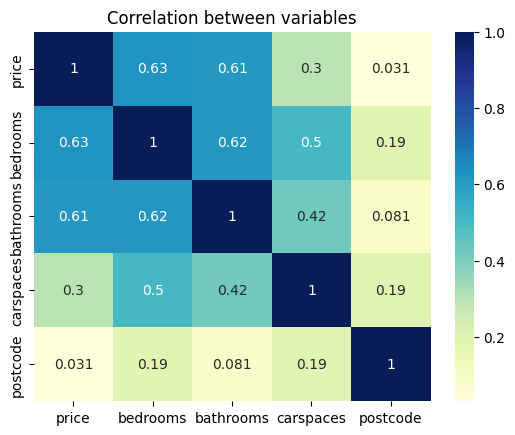

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the data to see the correlation
pcm = sns.heatmap(rent[cols].corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation between variables")
plt.show()

### 1 - The influence of number of bedrooms

In [11]:
# get the different data with different number of bedrooms
rent_1bedroom = rent[rent.bedrooms == 1]
rent_2bedroom = rent[rent.bedrooms == 2]
rent_3bedroom = rent[rent.bedrooms == 3]
rent_4bedroom = rent[rent.bedrooms == 4]
rent_5bedroom = rent[rent.bedrooms == 5]
rent_6bedroom = rent[rent.bedrooms == 6]
rent_7bedroom = rent[rent.bedrooms == 7]

In [12]:
# check the number of rows
print(rent_1bedroom.shape[0])
print(rent_2bedroom.shape[0])
print(rent_3bedroom.shape[0])
print(rent_4bedroom.shape[0])
print(rent_5bedroom.shape[0])
print(rent_6bedroom.shape[0])
print(rent_7bedroom.shape[0])

266
553
283
103
11
3
1


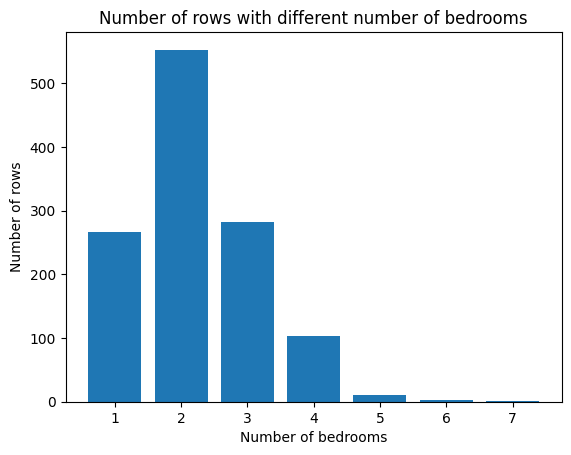

In [13]:
# plot the different bedrooms data
import matplotlib.pyplot as plt

bedrooms = [1, 2, 3, 4, 5, 6, 7]
bedrooms_shape = [rent_1bedroom.shape[0], rent_2bedroom.shape[0], rent_3bedroom.shape[0], 
                  rent_4bedroom.shape[0], rent_5bedroom.shape[0], rent_6bedroom.shape[0], 
                  rent_7bedroom.shape[0]]

plt.bar(bedrooms, bedrooms_shape)
plt.xlabel("Number of bedrooms")
plt.ylabel("Number of rows")
plt.title("Number of rows with different number of bedrooms")
plt.show()

In [14]:
# get the mean price of different number of bedrooms
mean1 = rent_1bedroom["price"].mean()
mean2 = rent_2bedroom["price"].mean()
mean3 = rent_3bedroom["price"].mean()
mean4 = rent_4bedroom["price"].mean()
mean5 = rent_5bedroom["price"].mean()
mean6 = rent_6bedroom["price"].mean()
mean7 = rent_7bedroom["price"].mean()

# create a list of mean price
mean_list = [mean1, mean2, mean3, mean4, mean5, mean6, mean7]
mean_list

[396.33458646616543,
 527.493670886076,
 727.8445229681979,
 921.8932038834952,
 939.5454545454545,
 1433.3333333333333,
 1400.0]

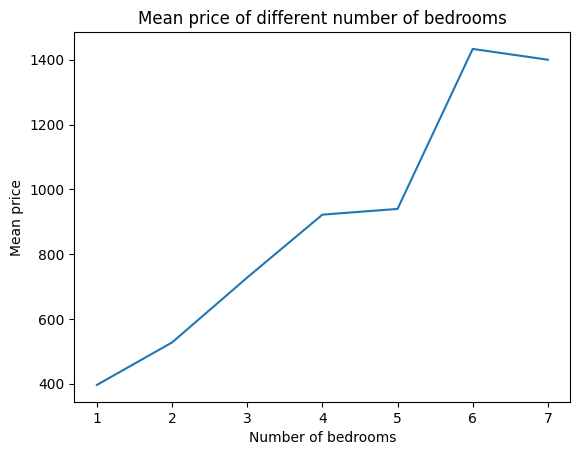

In [15]:
# plot the mean price of different number of bedrooms
plt.plot(bedrooms, mean_list)
plt.xlabel("Number of bedrooms")
plt.ylabel("Mean price")
plt.title("Mean price of different number of bedrooms")
plt.show()

In [16]:
def growth_rate (past, present):
    """
    This function takes in a dataframe and a column name
    and returns the growth rate of the column
    """
    # get the growth rate
    growth_rate = (present - past) / past
    
    return growth_rate

# get the growth rate
rate1 = growth_rate(mean1, mean2)
rate2 = growth_rate(mean2, mean3)
rate3 = growth_rate(mean3, mean4)
rate4 = growth_rate(mean4, mean5)
rate5 = growth_rate(mean5, mean6)
rate6 = growth_rate(mean6, mean7)
growth_rate_list = [rate1, rate2, rate3, rate4, rate5, rate6]

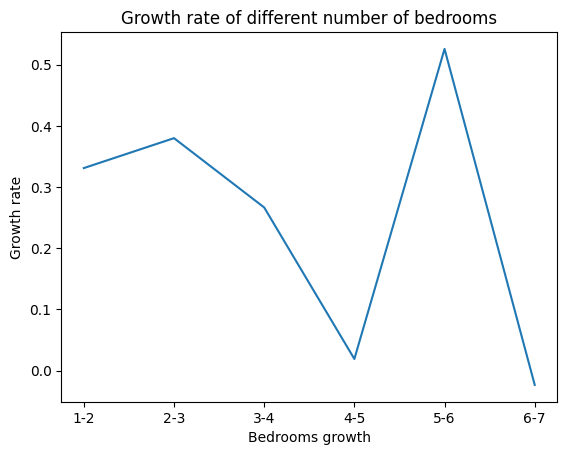

In [17]:
# plot the growth rate
growth_cols = ["1-2", "2-3", "3-4", "4-5", "5-6", "6-7"]
plt.plot(growth_cols, growth_rate_list)
plt.xlabel("Bedrooms growth")
plt.ylabel("Growth rate")
plt.title("Growth rate of different number of bedrooms")
plt.show()

In [24]:
# Past several years data
# Data from https://www.dffh.vic.gov.au/moving-annual-rents-suburb-june-quarter-2022-excel

xlsx = pd.ExcelFile("../data/raw/rental.xlsx")

bedroom1_flat = pd.read_excel(xlsx, "1 bedroom flat")
bedroom2_flat = pd.read_excel(xlsx, "2 bedroom flat")
bedroom3_flat = pd.read_excel(xlsx, "3 bedroom flat")
bedroom2_house = pd.read_excel(xlsx, "2 bedroom house")
bedroom3_house = pd.read_excel(xlsx, "3 bedroom house")
bedroom4_house = pd.read_excel(xlsx, "4 bedroom house")

### The influence of bathrooms

### The influence of Carspaces

### The influence of property types